Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


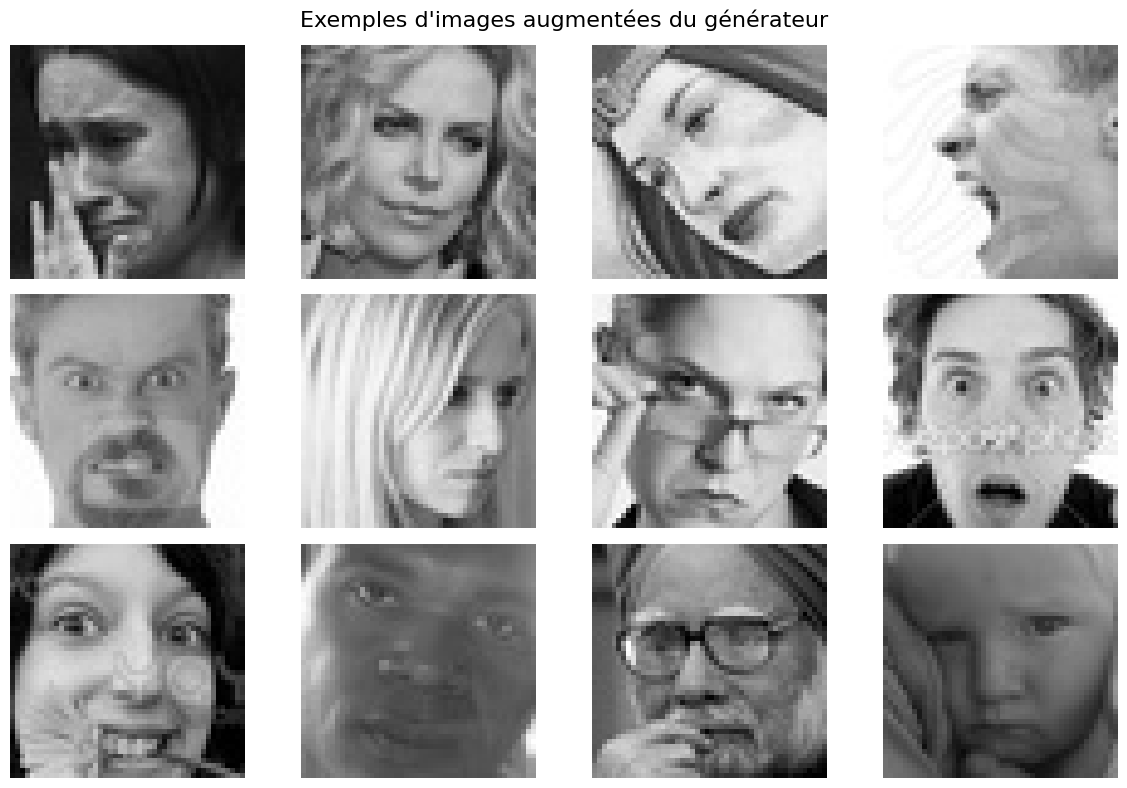

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# 🔹 Charger les données avec augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    "../data/train", target_size=(48, 48), batch_size=32, class_mode="categorical", subset="training"
)
validation_generator = train_datagen.flow_from_directory(
    "../data/train", target_size=(48, 48), batch_size=32, class_mode="categorical", subset="validation"
)

import matplotlib.pyplot as plt
import numpy as np

# Afficher un batch d'images transformées par le générateur
images, labels = next(train_generator)  # Obtenir un batch

plt.figure(figsize=(12, 8))
for i in range(12):  # Afficher les 12 premières images du batch
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle('Exemples d\'images augmentées du générateur', fontsize=16)
plt.tight_layout()
plt.show()


In [7]:
from tensorflow.keras.applications import VGG16

# Charger VGG16 sans les couches Fully Connected
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))

# Geler les couches sauf les 4 dernières
for layer in base_model.layers[:-4]:  # Dégeler les dernières 4 couches
    layer.trainable = False  # Indentation obligatoire ici !

print(base_model.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

None


In [4]:
# Ajouter de nouvelles couches pour la classification
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(7, activation="softmax")  # 7 classes pour FER-2013
])

In [5]:
# Compiler le modèle
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [6]:
# Entraîner le modèle (première phase)
history_transfer = model.fit(train_generator, epochs=25, validation_data=validation_generator)
#  afficher le pourcentage final
final_train_accuracy = history_transfer.history['accuracy'][-1] * 100  # Accuracy entraînement
final_val_accuracy = history_transfer.history['val_accuracy'][-1] * 100  # Accuracy validation

print(f"Précision finale sur l'ensemble d'entraînement : {final_train_accuracy:.2f}%")
print(f"Précision finale sur l'ensemble de validation : {final_val_accuracy:.2f}%")


Epoch 1/25


C:\Users\DELL\anaconda3\envs\analyse-sentiment\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 189s 261ms/step - accuracy: 0.2823 - loss: 1.7824 - val_accuracy: 0.3701 - val_loss: 1.6151
Epoch 2/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 172s 239ms/step - accuracy: 0.3641 - loss: 1.6330 - val_accuracy: 0.3757 - val_loss: 1.5835
Epoch 3/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 171s 238ms/step - accuracy: 0.3776 - loss: 1.5971 - val_accuracy: 0.3928 - val_loss: 1.5612
Epoch 4/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 174s 242ms/step - accuracy: 0.3868 - loss: 1.5723 - val_accuracy: 0.3935 - val_loss: 1.5555
Epoch 5/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 171s 238ms/step - accuracy: 0.3958 - loss: 1.5567 - val_accuracy: 0.4027 - val_loss: 1.5421
Epoch 6/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 199s 276ms/step - accuracy: 0.4089 - loss: 1.5428 - val_accuracy: 0.4034 - val_loss: 1.5394
Epoch 7/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 125s 174ms/step - accuracy: 0.4097 - loss: 1.5272 - val_accuracy: 0.4043 - val_loss: 1.5292
Epoch 8/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 125s 175ms/step - accuracy: 0.4103 - loss: 1.51

In [7]:
# Sauvegarder le modèle
model.save("../models/transfer_model.keras")


In [8]:
#  Débloquer quelques couches de VGG16 (fine-tuning partiel)
for layer in base_model.layers[-4:]:  # Tu peux augmenter ce nombre progressivement
    layer.trainable = True


In [9]:
# Recompiler avec un petit learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
#  Réentraîner le modèle (phase fine-tuning)
history_finetune = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 192s 266ms/step - accuracy: 0.4694 - loss: 1.3810 - val_accuracy: 0.4555 - val_loss: 1.4473
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 194s 270ms/step - accuracy: 0.5178 - loss: 1.2681 - val_accuracy: 0.4788 - val_loss: 1.4023
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 190s 264ms/step - accuracy: 0.5476 - loss: 1.1909 - val_accuracy: 0.4884 - val_loss: 1.3884
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 196s 273ms/step - accuracy: 0.5667 - loss: 1.1314 - val_accuracy: 0.4968 - val_loss: 1.3849
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 191s 266ms/step - accuracy: 0.5954 - loss: 1.0633 - val_accuracy: 0.4966 - val_loss: 1.3757
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 182s 254ms/step - accuracy: 0.6166 - loss: 1.0099 - val_accuracy: 0.5072 - val_loss: 1.3583
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 188s 262ms/step - accuracy: 0.6403 - loss: 0.9497 - val_accuracy: 0.5192 - val_loss: 1.3723
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 189s 264ms/step - accuracy: 0.6676 -

In [11]:
# Sauvegarder le nouveau modèle fine-tuné
model.save("../models/vgg16_finetuned.keras")


In [12]:
#  Afficher les nouvelles précisions
final_train_accuracy = history_finetune.history['accuracy'][-1] * 100
final_val_accuracy = history_finetune.history['val_accuracy'][-1] * 100

print(f"Après fine-tuning - Train Accuracy : {final_train_accuracy:.2f}%")
print(f"Après fine-tuning - Validation Accuracy : {final_val_accuracy:.2f}%")


Après fine-tuning - Train Accuracy : 70.21%
Après fine-tuning - Validation Accuracy : 52.92%


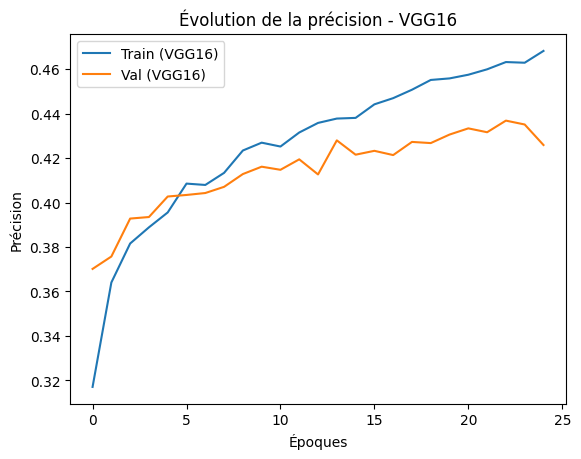

In [13]:
import matplotlib.pyplot as plt
plt.plot(history_transfer.history['accuracy'], label='Train (VGG16)')
plt.plot(history_transfer.history['val_accuracy'], label='Val (VGG16)')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.title('Évolution de la précision - VGG16')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


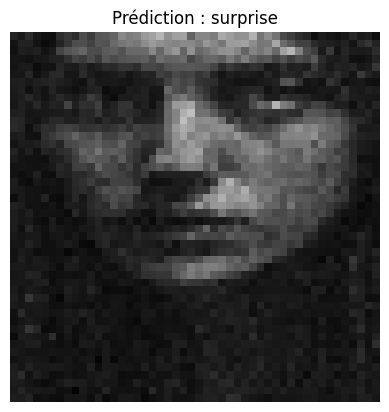

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
model_path = "../models/transfer_model.keras"
img_path = "../data/images/test2.jpg"

# 1. Charger le modèle
model = load_model(model_path)

# 2. Charger l'image en RGB (même si elle est en gris)
img = image.load_img(img_path, target_size=(48, 48), color_mode="rgb")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape (1,48,48,3)

# 3. Prédiction
predictions = model.predict(img_array)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_class = class_names[np.argmax(predictions)]

# 4. Affichage
plt.imshow(img)
plt.title(f"Prédiction : {predicted_class}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


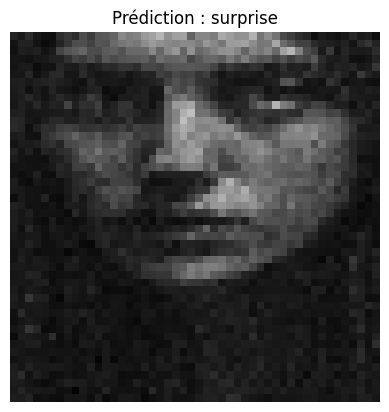

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
model_path = "../models/vgg16_finetuned.keras"
img_path = "../data/images/test2.jpg"

# 1. Charger le modèle
model = load_model(model_path)

# 2. Charger l'image en RGB (même si elle est en gris)
img = image.load_img(img_path, target_size=(48, 48), color_mode="rgb")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape (1,48,48,3)

# 3. Prédiction
predictions = model.predict(img_array)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_class = class_names[np.argmax(predictions)]

# 4. Affichage
plt.imshow(img)
plt.title(f"Prédiction : {predicted_class}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


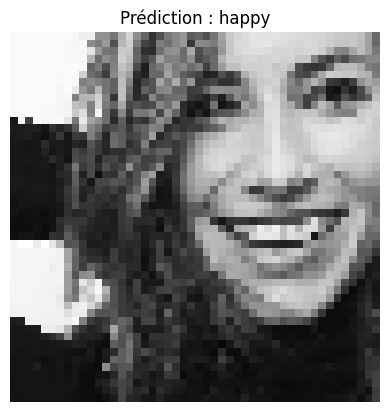

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
model_path = "../models/vgg16_finetuned.keras"
img_path = "../data/images/test3.jpg"

# 1. Charger le modèle
model = load_model(model_path)

# 2. Charger l'image en RGB (même si elle est en gris)
img = image.load_img(img_path, target_size=(48, 48), color_mode="rgb")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape (1,48,48,3)

# 3. Prédiction
predictions = model.predict(img_array)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_class = class_names[np.argmax(predictions)]

# 4. Affichage
plt.imshow(img)
plt.title(f"Prédiction : {predicted_class}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


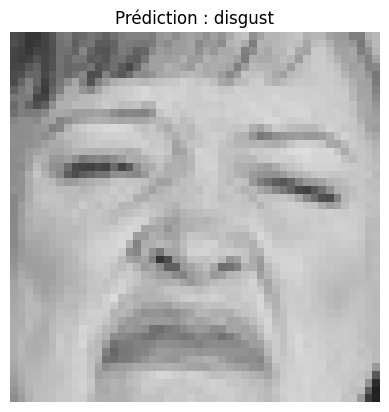

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
model_path = "../models/vgg16_finetuned.keras"
img_path = "../data/train/disgust/Training_2408820.jpg"

# 1. Charger le modèle
model = load_model(model_path)

# 2. Charger l'image en RGB (même si elle est en gris)
img = image.load_img(img_path, target_size=(48, 48,3), color_mode="rgb")
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape (1,48,48,3)

# 3. Prédiction
predictions = model.predict(img_array)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_class = class_names[np.argmax(predictions)]

# 4. Affichage
plt.imshow(img)
plt.title(f"Prédiction : {predicted_class}")
plt.axis("off")
plt.show()

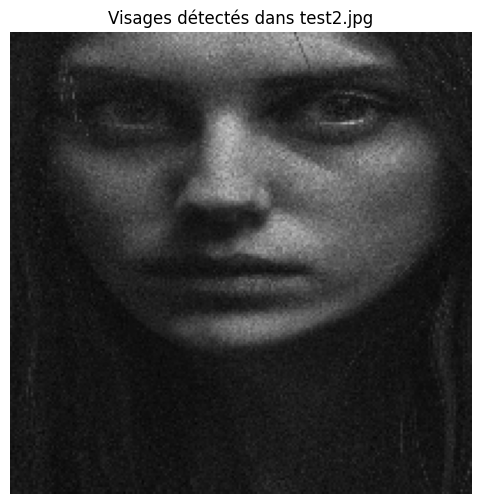

In [16]:
import cv2
from matplotlib import pyplot as plt

# Charger l'image test2.jpg
img_path = "../data/images/test2.jpg"
img = cv2.imread(img_path)

# Vérifier que l'image est bien chargée
if img is None:
    print("❌ Image non trouvée. Vérifie le chemin :", img_path)
else:
    # Redimensionner pour traitement si nécessaire (optionnel)
    resized_img_bgr = cv2.resize(img, (200, 200))  # tu peux ajuster la taille ici

    # Charger le détecteur de visage de Haar cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Convertir en niveaux de gris pour détection
    gray = cv2.cvtColor(resized_img_bgr, cv2.COLOR_BGR2GRAY)

    # Détection des visages
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Dessiner les rectangles sur les visages détectés
    for (x, y, w, h) in faces:
        cv2.rectangle(resized_img_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Affichage
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(resized_img_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Visages détectés dans test2.jpg")
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


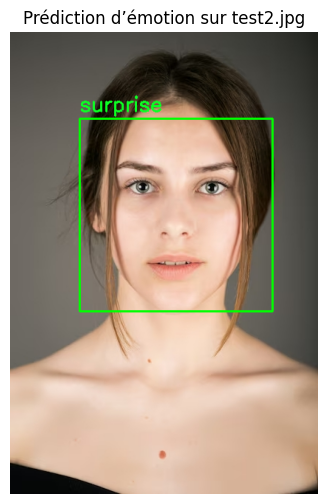

In [22]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# 1. Charger l'image originale
img_path = "../data/images/test4.jpg"
original_img = cv2.resize(original_img, (800, 600))  # à adapter selon ton image
original_img = cv2.imread(img_path)


if original_img is None:
    print("❌ Image introuvable :", img_path)
else:
    # 2. Charger le modèle
    model = load_model("../models/vgg16_finetuned.keras")  

    # 3. Charger le détecteur de visage
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # 4. Convertir l’image en niveaux de gris pour la détection
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    # 5. Détecter les visages
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("😕 Aucun visage détecté.")
    else:
        for (x, y, w, h) in faces:
            # 6. Extraire le visage
            face = original_img[y:y+h, x:x+w]

            # 7. Redimensionner le visage à (48, 48)
            face = cv2.resize(face, (48, 48))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)  # passer en RGB
            face = face.astype("float32") / 255.0
            face = np.expand_dims(face, axis=0)  # Shape: (1, 48, 48, 3)

            # 8. Prédire l’émotion
            predictions = model.predict(face)
            emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
            predicted_emotion = emotion_labels[np.argmax(predictions)]

            # 9. Affichage
            cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(original_img, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

        # 10. Afficher l’image avec la prédiction
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title("Prédiction d’émotion sur test2.jpg")
        plt.axis("off")
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


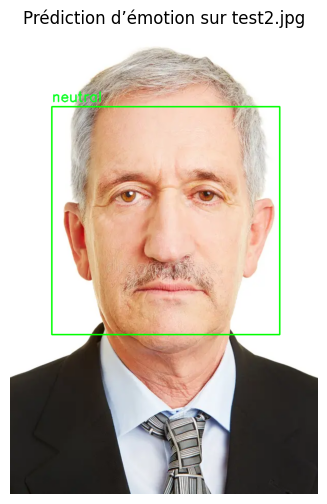

In [23]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# 1. Charger l'image originale
img_path = "../data/images/test1.png"
original_img = cv2.resize(original_img, (800, 600))  # à adapter selon ton image
original_img = cv2.imread(img_path)


if original_img is None:
    print("❌ Image introuvable :", img_path)
else:
    # 2. Charger le modèle
    model = load_model("../models/vgg16_finetuned.keras")  

    # 3. Charger le détecteur de visage
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # 4. Convertir l’image en niveaux de gris pour la détection
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    # 5. Détecter les visages
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("😕 Aucun visage détecté.")
    else:
        for (x, y, w, h) in faces:
            # 6. Extraire le visage
            face = original_img[y:y+h, x:x+w]

            # 7. Redimensionner le visage à (48, 48)
            face = cv2.resize(face, (48, 48))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)  # passer en RGB
            face = face.astype("float32") / 255.0
            face = np.expand_dims(face, axis=0)  # Shape: (1, 48, 48, 3)

            # 8. Prédire l’émotion
            predictions = model.predict(face)
            emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
            predicted_emotion = emotion_labels[np.argmax(predictions)]

            # 9. Affichage
            cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(original_img, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

        # 10. Afficher l’image avec la prédiction
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title("Prédiction d’émotion sur test2.jpg")
        plt.axis("off")
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


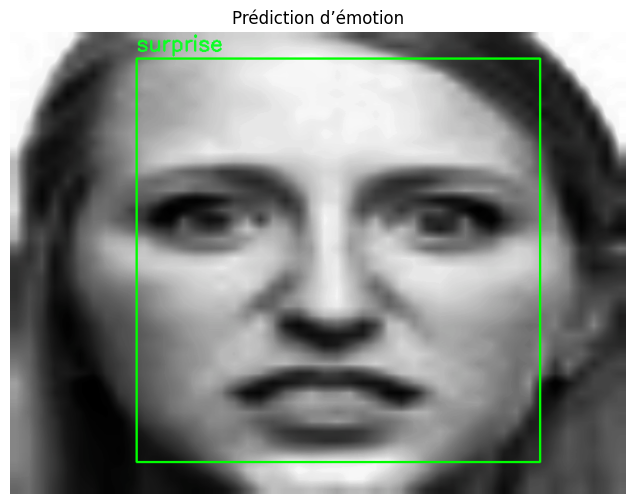

In [28]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# 1. Charger l'image originale
img_path = "../data/test/fear/PrivateTest_623230.jpg"
original_img = cv2.imread(img_path)

if original_img is None:
    print("❌ Image introuvable :", img_path)
else:
    # 🟡 Facultatif : redimensionner pour affichage
    original_img = cv2.resize(original_img, (800, 600))

    # 🟢 2. Amélioration automatique de l’image (contraste et luminosité)
    lab = cv2.cvtColor(original_img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)  # Égalisation d’histogramme sur le canal L
    lab = cv2.merge((l, a, b))
    original_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # 3. Charger le modèle
    model = load_model("../models/vgg16_finetuned.keras")

    # 4. Charger le détecteur de visage
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # 5. Convertir en niveaux de gris pour la détection
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    # 6. Détecter les visages
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("😕 Aucun visage détecté.")
    else:
        emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        for (x, y, w, h) in faces:
            face = original_img[y:y+h, x:x+w]
            face = cv2.resize(face, (48, 48))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = face.astype("float32") / 255.0
            face = np.expand_dims(face, axis=0)

            predictions = model.predict(face)
            predicted_emotion = emotion_labels[np.argmax(predictions)]

            cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(original_img, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # 7. Affichage final
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title("Prédiction d’émotion")
        plt.axis("off")
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


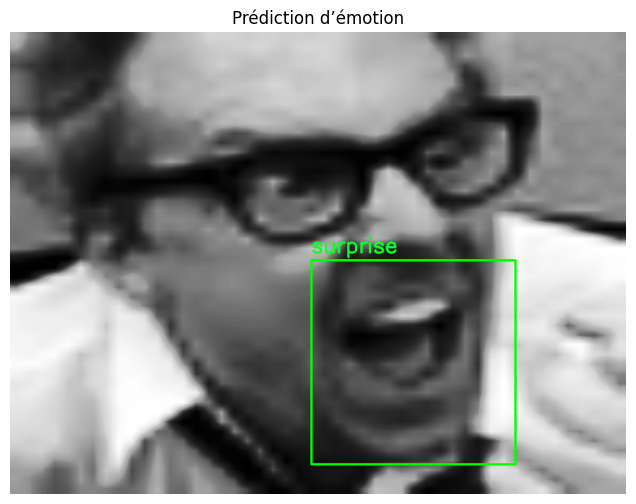

In [32]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# 1. Charger l'image originale
img_path = "../data/train/angry/Training_3908.jpg"
original_img = cv2.imread(img_path)

if original_img is None:
    print("❌ Image introuvable :", img_path)
else:
    # 🟡 Facultatif : redimensionner pour affichage
    original_img = cv2.resize(original_img, (800, 600))

    # 🟢 2. Amélioration automatique de l’image (contraste et luminosité)
    lab = cv2.cvtColor(original_img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)  # Égalisation d’histogramme sur le canal L
    lab = cv2.merge((l, a, b))
    original_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # 3. Charger le modèle
    model = load_model("../models/vgg16_finetuned.keras")

    # 4. Charger le détecteur de visage
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # 5. Convertir en niveaux de gris pour la détection
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    # 6. Détecter les visages
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("😕 Aucun visage détecté.")
    else:
        emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        for (x, y, w, h) in faces:
            face = original_img[y:y+h, x:x+w]
            face = cv2.resize(face, (48, 48))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = face.astype("float32") / 255.0
            face = np.expand_dims(face, axis=0)

            predictions = model.predict(face)
            predicted_emotion = emotion_labels[np.argmax(predictions)]

            cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(original_img, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # 7. Affichage final
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title("Prédiction d’émotion")
        plt.axis("off")
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


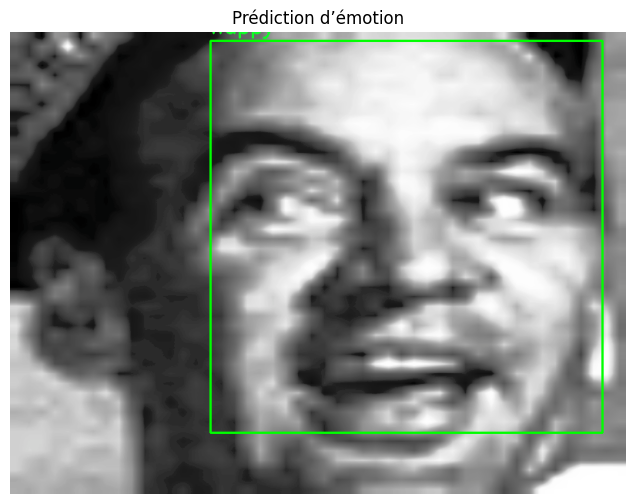

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# 1. Charger l'image originale
img_path = "../data/test/happy/PrivateTest_9614390.jpg"
original_img = cv2.imread(img_path)

if original_img is None:
    print("❌ Image introuvable :", img_path)
else:
    # 🟡 Facultatif : redimensionner pour affichage
    original_img = cv2.resize(original_img, (800, 600))

    # 🟢 2. Amélioration automatique de l’image (contraste et luminosité)
    lab = cv2.cvtColor(original_img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)  # Égalisation d’histogramme sur le canal L
    lab = cv2.merge((l, a, b))
    original_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # 3. Charger le modèle
    model = load_model("../models/vgg16_finetuned.keras")

    # 4. Charger le détecteur de visage
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # 5. Convertir en niveaux de gris pour la détection
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    # 6. Détecter les visages
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("😕 Aucun visage détecté.")
    else:
        emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        for (x, y, w, h) in faces:
            face = original_img[y:y+h, x:x+w]
            face = cv2.resize(face, (48, 48))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = face.astype("float32") / 255.0
            face = np.expand_dims(face, axis=0)

            predictions = model.predict(face)
            predicted_emotion = emotion_labels[np.argmax(predictions)]

            cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(original_img, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # 7. Affichage final
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title("Prédiction d’émotion")
        plt.axis("off")
        plt.show()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# 1. Charger l'image originale
img_path = "../data/test/sad/PrivateTest_9614390.jpg"
original_img = cv2.imread(img_path)

if original_img is None:
    print("❌ Image introuvable :", img_path)
else:
    # 🟡 Facultatif : redimensionner pour affichage
    original_img = cv2.resize(original_img, (800, 600))

    # 🟢 2. Amélioration automatique de l’image (contraste et luminosité)
    lab = cv2.cvtColor(original_img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)  # Égalisation d’histogramme sur le canal L
    lab = cv2.merge((l, a, b))
    original_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # 3. Charger le modèle
    model = load_model("../models/vgg16_finetuned.keras")

    # 4. Charger le détecteur de visage
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # 5. Convertir en niveaux de gris pour la détection
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

    # 6. Détecter les visages
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("😕 Aucun visage détecté.")
    else:
        emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        for (x, y, w, h) in faces:
            face = original_img[y:y+h, x:x+w]
            face = cv2.resize(face, (48, 48))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = face.astype("float32") / 255.0
            face = np.expand_dims(face, axis=0)

            predictions = model.predict(face)
            predicted_emotion = emotion_labels[np.argmax(predictions)]

            cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(original_img, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # 7. Affichage final
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title("Prédiction d’émotion")
        plt.axis("off")
        plt.show()
